In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [237]:
train_data = pd.read_excel('/content/Data_Train.xlsx')

In [238]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [239]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [240]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [241]:
train_data.shape

(10683, 11)

In [242]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [243]:
train_data.dropna(inplace=True)

In [244]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [245]:
data=train_data.copy()

In [246]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [247]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [248]:
def change_into_datetime(col): 
    data[col]= pd.to_datetime(data[col])

In [249]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [250]:
for feature in ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']: 
    change_into_datetime(feature)

In [251]:
data.dtypes


Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [252]:
data['Date_of_Journey'].min()

Timestamp('2019-01-03 00:00:00')

In [253]:
data['Date_of_Journey'].max()

Timestamp('2019-12-06 00:00:00')

In [254]:
data['journey_day']= data['Date_of_Journey'].dt.day

In [255]:
data['journey_month']= data['Date_of_Journey'].dt.month

In [256]:
data['journey_year']= data['Date_of_Journey'].dt.year

In [257]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-01-26 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-01-26 05:50:00,2023-01-26 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019


In [258]:
data.drop('Date_of_Journey', axis=1, inplace=True)

In [259]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-01-26 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-01-26 05:50:00,2023-01-26 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-01-26 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2023-01-26 18:05:00,2023-01-26 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2023-01-26 16:50:00,2023-01-26 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019


In [260]:
def extract_hour_min(df,col): 
  df[col+'_hour']=df[col].dt.hour 
  df[col+'_min']=df[col].dt.minute 
  df.drop(col,axis=1,inplace=True) 
  return df.head(2)

In [261]:
extract_hour_min(data,'Dep_Time')

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-01-26 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50


In [262]:
extract_hour_min(data,'Arrival_Time')

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15


In [263]:
#Performing Data Analysis

In [264]:
def flight_dep_time(x): 
  if (x>4) and (x<8):
    return 'Early Morning' 
  elif (x>8) and (x<=12):
    return 'Morning' 
  elif (x>12) and (x<=16):
    return 'Noon'
  elif (x>16) and (x<=20):
    return 'Evening' 
  elif (x>20) and (x<=24):
    return 'Night'
  else:
    return 'Late Night'

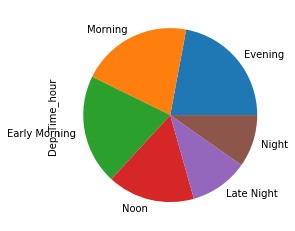

In [265]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind='pie')

In [266]:
data.head(15)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,24,6,2019,9,0,11,25
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,3,12,2019,18,55,10,25
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,3,1,2019,8,0,5,5
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,3,12,2019,8,55,10,25
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,7h 50m,1 stop,No info,8625,27,5,2019,11,25,19,15


In [267]:
def preprocess_duration(x): 
  if 'h' not in x:
      x='0h '+x
  elif 'm' not in x: 
      x=x+ ' 0m'
  return x

In [268]:
data['Duration']=data['Duration'].apply(preprocess_duration) 
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [269]:
data['Duration'][2].split(' ')

['19h', '0m']

In [270]:
int(data['Duration'][1336].split(' ')[0][0:-1])

23

In [271]:
int(data['Duration'][373].split(' ')[1][0:-1])

50

In [272]:
data['Duration_hours']=data['Duration'].apply(lambda x:int(x.split(' ')[0][0:-1]))

In [273]:
data['Duration_mins']=data['Duration'].apply(lambda x:int(x.split(' ')[1][0:-1]))

In [274]:
data.head(15)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,24,6,2019,9,0,11,25,2,25
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,3,12,2019,18,55,10,25,15,30
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,3,1,2019,8,0,5,5,21,5
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,3,12,2019,8,55,10,25,25,30
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,7h 50m,1 stop,No info,8625,27,5,2019,11,25,19,15,7,50


In [275]:
# 1. Analyse wether Duration impacts on price or not
# 2. Which city has maximum final destination of flights


In [276]:
data['Duration_total_mins']=data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [277]:
data.head(10)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45,285
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,24,6,2019,9,0,11,25,2,25,145
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,3,12,2019,18,55,10,25,15,30,930
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,3,1,2019,8,0,5,5,21,5,1265
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,3,12,2019,8,55,10,25,25,30,1530
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,7h 50m,1 stop,No info,8625,27,5,2019,11,25,19,15,7,50,470


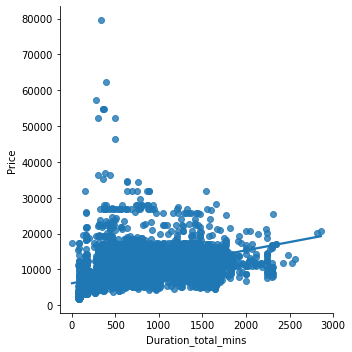

In [278]:
sns.lmplot(x='Duration_total_mins', y='Price',data=data)

In [279]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [280]:
data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

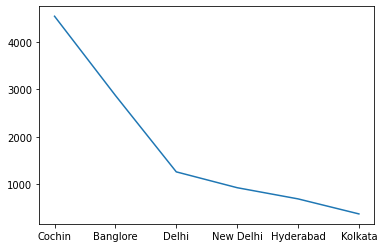

In [281]:
data['Destination'].value_counts().plot(kind='line')

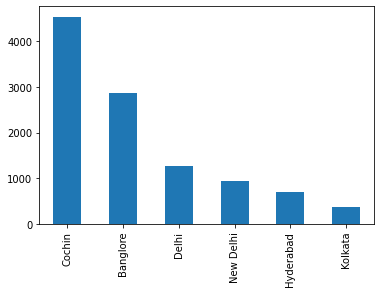

In [282]:
data['Destination'].value_counts().plot(kind='bar')

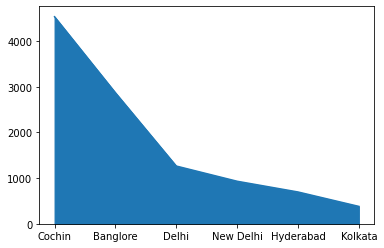

In [283]:
data['Destination'].value_counts().plot(kind='area')

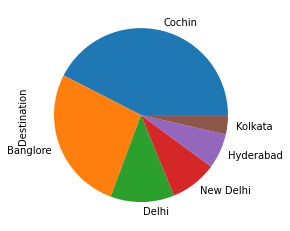

In [284]:
data['Destination'].value_counts().plot(kind='pie')

In [285]:
# Problem Statement : On which route jet Airways is extremely used?

In [286]:
data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [287]:
data['Airline']

0             IndiGo
1          Air India
2        Jet Airways
3             IndiGo
4             IndiGo
            ...     
10678       Air Asia
10679      Air India
10680    Jet Airways
10681        Vistara
10682      Air India
Name: Airline, Length: 10682, dtype: object

In [288]:
data['Airline']=='Jet Airways'

0        False
1        False
2         True
3        False
4        False
         ...  
10678    False
10679    False
10680     True
10681    False
10682    False
Name: Airline, Length: 10682, dtype: bool

In [289]:
data['Airline']=='IndiGo'

0         True
1        False
2        False
3         True
4         True
         ...  
10678    False
10679    False
10680    False
10681    False
10682    False
Name: Airline, Length: 10682, dtype: bool

In [290]:
data['Airline']=='Air India'

0        False
1         True
2        False
3        False
4        False
         ...  
10678    False
10679     True
10680    False
10681    False
10682     True
Name: Airline, Length: 10682, dtype: bool

In [291]:
data[data['Airline']=='Jet Airways']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins,Duration_total_mins
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0,1140
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,3,12,2019,18,55,10,25,15,30,930
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,3,1,2019,8,0,5,5,21,5,1265
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,3,12,2019,8,55,10,25,25,30,1530
13,Jet Airways,Kolkata,Banglore,CCU → BOM → BLR,12h 10m,1 stop,In-flight meal not included,9663,5,9,2019,21,10,9,20,12,10,730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10668,Jet Airways,Delhi,Cochin,DEL → JDH → BOM → COK,7h 20m,2 stops,No info,21219,5,9,2019,11,40,19,0,7,20,440
10672,Jet Airways,Delhi,Cochin,DEL → AMD → BOM → COK,19h 55m,2 stops,In-flight meal not included,11150,27,6,2019,23,5,19,0,19,55,1195
10673,Jet Airways,Delhi,Cochin,DEL → AMD → BOM → COK,15h 0m,2 stops,No info,16704,27,5,2019,13,25,4,25,15,0,900
10674,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,24h 45m,1 stop,In-flight meal not included,11087,3,12,2019,20,35,21,20,24,45,1485


In [292]:
data[data['Airline']=='Air India']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins,Duration_total_mins
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445
10,Air India,Delhi,Cochin,DEL → BLR → COK,13h 15m,1 stop,No info,8907,6,1,2019,9,45,23,0,13,15,795
12,Air India,Chennai,Kolkata,MAA → CCU,2h 15m,non-stop,No info,4667,24,6,2019,11,40,13,55,2,15,135
15,Air India,Delhi,Cochin,DEL → AMD → BOM → COK,26h 35m,2 stops,No info,14011,3,3,2019,16,40,19,15,26,35,1595
18,Air India,Delhi,Cochin,DEL → CCU → BOM → COK,23h 0m,2 stops,No info,13381,6,12,2019,20,15,19,15,23,0,1380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10670,Air India,Kolkata,Banglore,CCU → IXR → DEL → BLR,17h 25m,2 stops,No info,11411,5,12,2019,5,50,23,15,17,25,1045
10671,Air India,Mumbai,Hyderabad,BOM → HYD,1h 20m,non-stop,No info,3100,6,6,2019,21,5,22,25,1,20,80
10675,Air India,Mumbai,Hyderabad,BOM → HYD,1h 20m,non-stop,No info,3100,6,9,2019,6,20,7,40,1,20,80
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,2019,20,45,23,20,2,35,155


In [293]:
data[data['Airline']=='IndiGo']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45,285
11,IndiGo,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4174,18,4,2019,20,20,22,55,2,35,155
14,IndiGo,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4804,24,4,2019,17,15,19,50,2,35,155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10631,IndiGo,Delhi,Cochin,DEL → BLR → COK,5h 45m,1 stop,No info,6037,15,5,2019,2,0,7,45,5,45,345
10641,IndiGo,Chennai,Kolkata,MAA → CCU,2h 20m,non-stop,No info,7295,3,6,2019,7,55,10,15,2,20,140
10649,IndiGo,Kolkata,Banglore,CCU → BLR,2h 40m,non-stop,No info,4778,3,1,2019,21,25,0,5,2,40,160
10664,IndiGo,Banglore,Delhi,BLR → DEL,2h 55m,non-stop,No info,4823,4,9,2019,18,55,21,50,2,55,175


In [294]:
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

In [295]:
data[data['Airline']=='IndiGo'].groupby('Route').size().sort_values(ascending=False)

Route
BLR → DEL                483
CCU → BLR                320
DEL → BOM → COK          302
DEL → HYD → COK          196
BOM → HYD                195
MAA → CCU                184
DEL → COK                 59
DEL → BLR → COK           57
CCU → MAA → BLR           37
DEL → MAA → COK           34
CCU → HYD → BLR           32
CCU → BBI → BLR           19
DEL → HYD → MAA → COK     18
BLR → HYD → DEL           18
DEL → LKO → COK           17
DEL → PNQ → COK           12
CCU → PNQ → BLR           11
CCU → PAT → BLR           10
CCU → NAG → BLR            9
BLR → IDR → DEL            5
DEL → BBI → COK            5
BLR → BOM → DEL            4
CCU → GAU → BLR            3
DEL → AMD → COK            3
BLR → NAG → DEL            3
BLR → LKO → DEL            3
BLR → AMD → DEL            3
DEL → TRV → COK            2
BLR → STV → DEL            2
BLR → GOI → DEL            1
CCU → VTZ → BLR            1
BOM → GOI → HYD            1
CCU → IXA → BLR            1
CCU → BOM → BLR            1
BLR → MA

In [296]:
data[data['Airline']=='Air India'].groupby('Route').size().sort_values(ascending=False)

Route
BLR → DEL                      158
DEL → BOM → COK                117
BOM → HYD                       98
DEL → MAA → COK                 77
DEL → COK                       75
                              ... 
BOM → RPR → VTZ → HYD            1
BOM → JDH → JAI → DEL → HYD      1
BOM → JAI → DEL → HYD            1
BOM → IDR → DEL → HYD            1
BLR → HBX → BOM → NAG → DEL      1
Length: 92, dtype: int64

In [297]:
# Problem Stamements:
#   1. On which route Jet Airways is extremely used? 2. Airline vs Price Analysis?


In [298]:
# Box Plot:
# Q1,Q2,Q3,Q4
# IQR : Inter Quartile Range = Q3 - Q1 Max = Q3 + 1.5IQR
# Min = Q3 - 1.5IQR

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

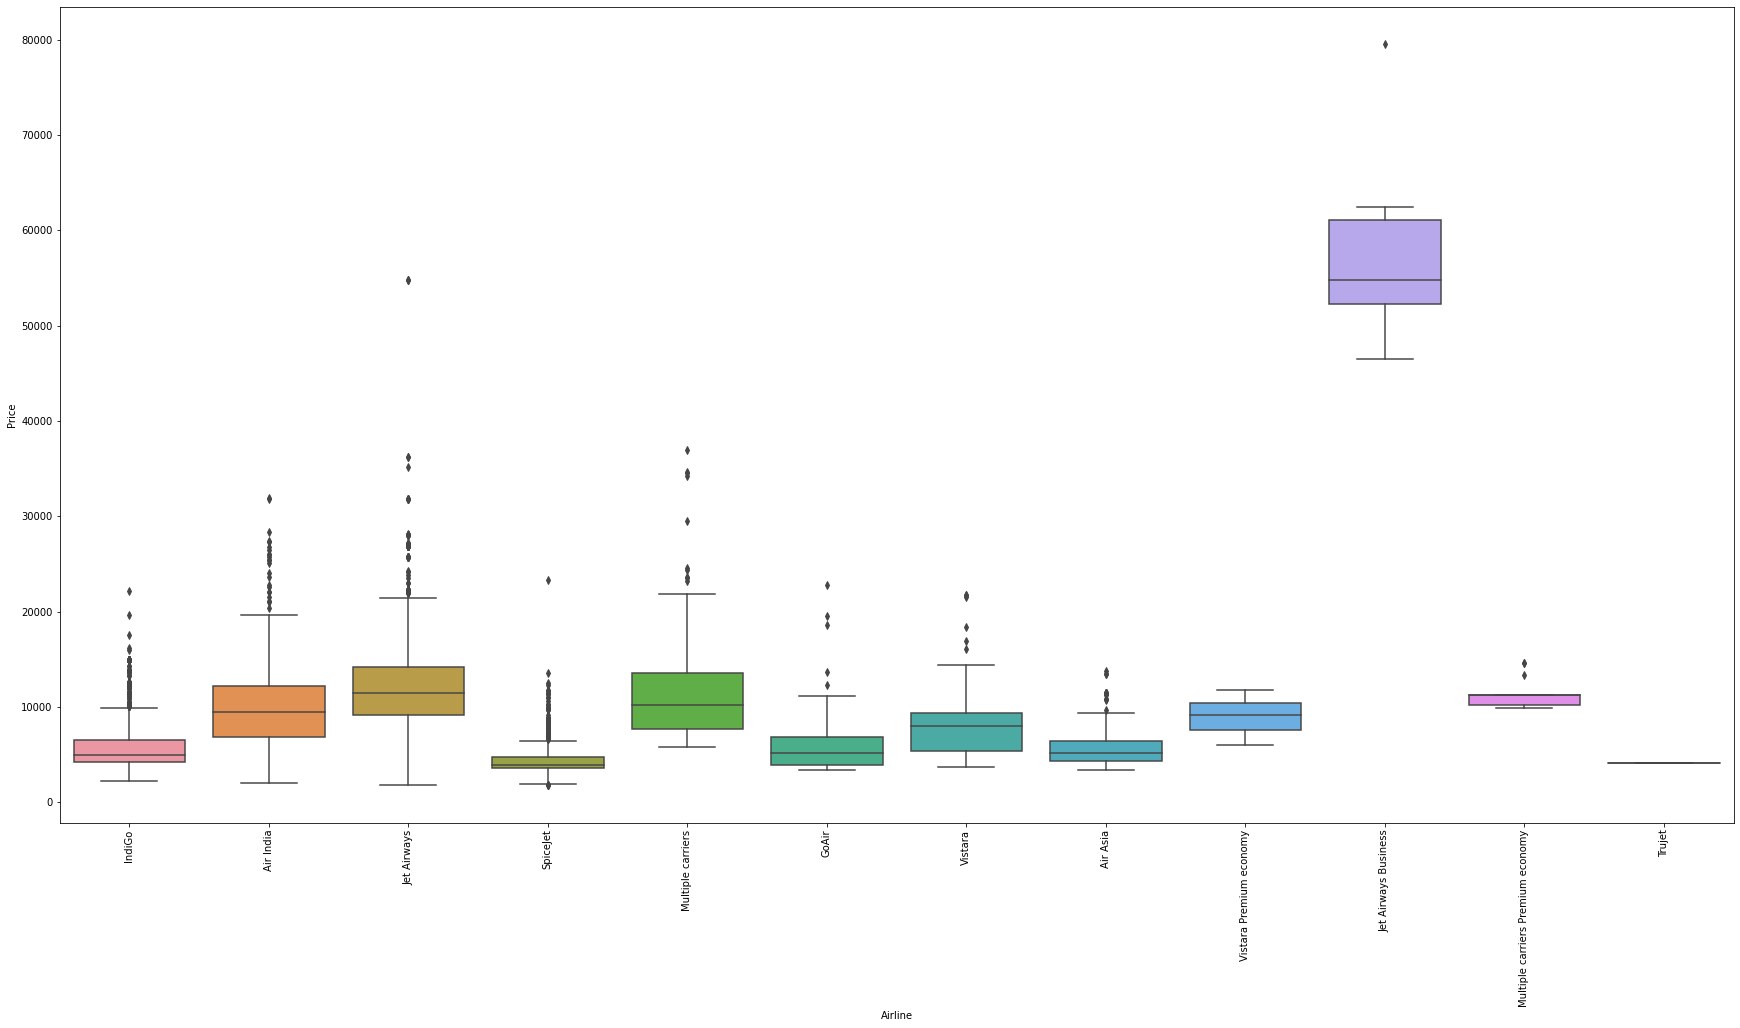

In [299]:
plt.figure(figsize=(30,15)) 
sns.boxplot(y='Price', x='Airline',data=data) 
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

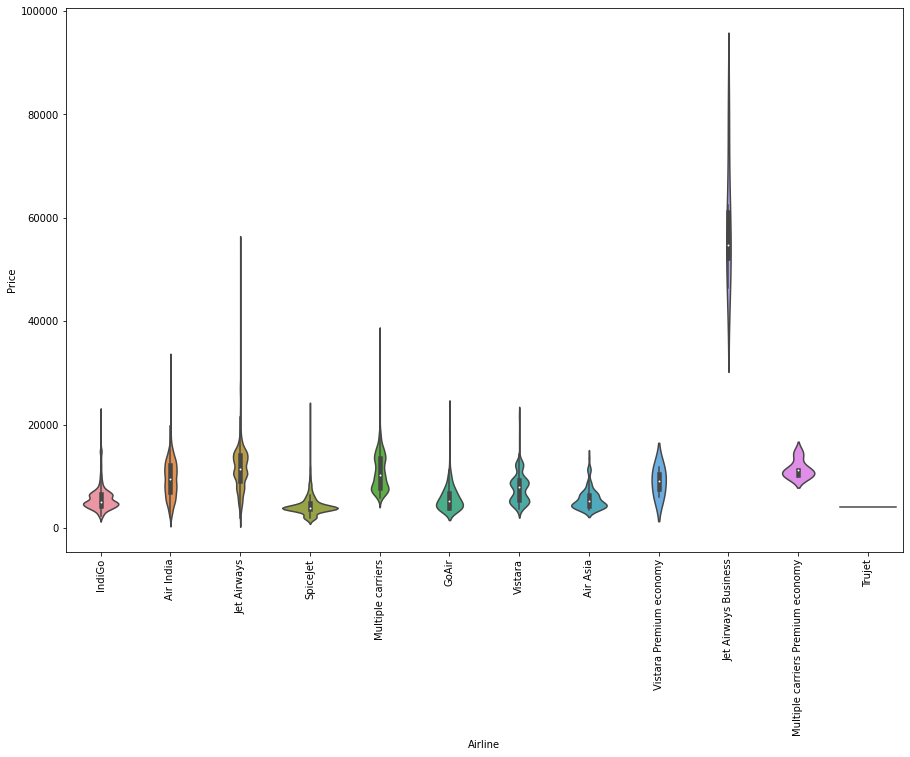

In [300]:
plt.figure(figsize=(15,10)) 
sns.violinplot(y='Price', x='Airline', data=data) 
plt.xticks(rotation='vertical')

In [301]:
# Apply one hot Encoding on data(feature Encoding)

In [302]:
data.head(20)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45,285
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,24,6,2019,9,0,11,25,2,25,145
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,3,12,2019,18,55,10,25,15,30,930
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,3,1,2019,8,0,5,5,21,5,1265
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,3,12,2019,8,55,10,25,25,30,1530
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,7h 50m,1 stop,No info,8625,27,5,2019,11,25,19,15,7,50,470


In [303]:
np.round(data['Additional_Info'].value_counts()/len(data)*10685)

# Finding anad running along tthe whole datatset values i.e. 10685

No info                         8346.0
In-flight meal not included     1983.0
No check-in baggage included     320.0
1 Long layover                    19.0
Change airports                    7.0
Business class                     4.0
No Info                            3.0
1 Short layover                    1.0
Red-eye flight                     1.0
2 Long layover                     1.0
Name: Additional_Info, dtype: float64

In [304]:
cat_col = [col for col in data.columns if data[col].dtype=='object'] 
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [305]:
num_col = [col for col in data.columns if data[col].dtype!='object'] 
num_col

['Price',
 'journey_day',
 'journey_month',
 'journey_year',
 'Dep_Time_hour',
 'Dep_Time_min',
 'Arrival_Time_hour',
 'Arrival_Time_min',
 'Duration_hours',
 'Duration_mins',
 'Duration_total_mins']

In [306]:
data['Source']

0        Banglore
1         Kolkata
2           Delhi
3         Kolkata
4        Banglore
           ...   
10678     Kolkata
10679     Kolkata
10680    Banglore
10681    Banglore
10682       Delhi
Name: Source, Length: 10682, dtype: object

In [307]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [308]:
data['Source'].apply(lambda x: 1 if x=='Bangalore' else 0)

0        0
1        0
2        0
3        0
4        0
        ..
10678    0
10679    0
10680    0
10681    0
10682    0
Name: Source, Length: 10682, dtype: int64

In [309]:
data['Source'].apply(lambda x: 1 if x=='Kolkata' else 0)

0        0
1        1
2        0
3        1
4        0
        ..
10678    1
10679    1
10680    0
10681    0
10682    0
Name: Source, Length: 10682, dtype: int64

In [310]:
data['Source'].apply(lambda x: 1 if x=='Delhi' else 0)

0        0
1        0
2        1
3        0
4        0
        ..
10678    0
10679    0
10680    0
10681    0
10682    1
Name: Source, Length: 10682, dtype: int64

In [311]:
data['Source'].apply(lambda x: 1 if x=='Chennai' else 0)

0        0
1        0
2        0
3        0
4        0
        ..
10678    0
10679    0
10680    0
10681    0
10682    0
Name: Source, Length: 10682, dtype: int64

In [312]:
data['Source'].apply(lambda x: 1 if x=='Mumbai' else 0)

0        0
1        0
2        0
3        0
4        0
        ..
10678    0
10679    0
10680    0
10681    0
10682    0
Name: Source, Length: 10682, dtype: int64

In [313]:
for category in data['Source'].unique(): 
  data['Source_'+category]=data['Source'].apply(lambda x: 1 if x==category else 0)

In [314]:
data.head(50)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,...,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,...,1,10,2,50,170,1,0,0,0,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,...,13,15,7,25,445,0,1,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,...,4,25,19,0,1140,0,0,1,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,...,23,30,5,25,325,0,1,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,...,21,35,4,45,285,1,0,0,0,0
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,24,6,...,11,25,2,25,145,0,1,0,0,0
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,3,12,...,10,25,15,30,930,1,0,0,0,0
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,3,1,...,5,5,21,5,1265,1,0,0,0,0
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,3,12,...,10,25,25,30,1530,1,0,0,0,0
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,7h 50m,1 stop,No info,8625,27,5,...,19,15,7,50,470,0,0,1,0,0


In [315]:
# PERFORM TARGET GUIDED ENCODING ON DATA PERFORM MANUAL ENCODING ON DATA

In [316]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index 
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [317]:
dict1 = {key:index for index, key in enumerate(airlines,0)} 
dict1

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [318]:
data['Airline']=data['Airline'].map(dict1) 
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [319]:
data.head(20)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,...,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,...,1,10,2,50,170,1,0,0,0,0
1,7,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,...,13,15,7,25,445,0,1,0,0,0
2,10,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,...,4,25,19,0,1140,0,0,1,0,0
3,3,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,...,23,30,5,25,325,0,1,0,0,0
4,3,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,...,21,35,4,45,285,1,0,0,0,0
5,1,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,24,6,...,11,25,2,25,145,0,1,0,0,0
6,10,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,3,12,...,10,25,15,30,930,1,0,0,0,0
7,10,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,3,1,...,5,5,21,5,1265,1,0,0,0,0
8,10,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,3,12,...,10,25,25,30,1530,1,0,0,0,0
9,8,Delhi,Cochin,DEL → BOM → COK,7h 50m,1 stop,No info,8625,27,5,...,19,15,7,50,470,0,0,1,0,0


In [320]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [321]:
data['Destination'].replace('New Delhi','Delhi', inplace=True)

In [322]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [323]:
dest=data.groupby(['Destination'])['Price'].mean().sort_values().index 
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [324]:
dict2 = {key:index for index, key in enumerate(dest,0)} 
dict2

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [325]:
data['Destination']=data['Destination'].map(dict2) 
data['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [326]:
data.head(25)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,...,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,...,1,10,2,50,170,1,0,0,0,0
1,7,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,...,13,15,7,25,445,0,1,0,0,0
2,10,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,...,4,25,19,0,1140,0,0,1,0,0
3,3,Kolkata,3,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,...,23,30,5,25,325,0,1,0,0,0
4,3,Banglore,2,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,...,21,35,4,45,285,1,0,0,0,0
5,1,Kolkata,3,CCU → BLR,2h 25m,non-stop,No info,3873,24,6,...,11,25,2,25,145,0,1,0,0,0
6,10,Banglore,2,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,3,12,...,10,25,15,30,930,1,0,0,0,0
7,10,Banglore,2,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,3,1,...,5,5,21,5,1265,1,0,0,0,0
8,10,Banglore,2,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,3,12,...,10,25,25,30,1530,1,0,0,0,0
9,8,Delhi,4,DEL → BOM → COK,7h 50m,1 stop,No info,8625,27,5,...,19,15,7,50,470,0,0,1,0,0


In [327]:
stops={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [328]:
data['Total_Stops'] = data['Total_Stops'].map(stops) 
data['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [329]:
# Perform outlier Detection

In [330]:
# How to deal with Outlier

In [331]:
def plot(df,col): 
  fig,(ax1,ax2,ax3)=plt.subplots(3,1) 
  sns.distplot(df[col],ax=ax1) 
  sns.boxplot(df[col],ax=ax2, orient='h') 
  sns.distplot(df[col],ax=ax3,kde=False)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn

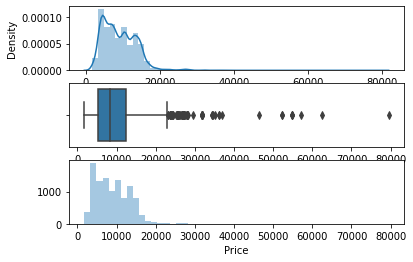

In [332]:
plot(data,'Price')

In [333]:
data['Price'] = np.where(data['Price']>=35000,data['Price'].median(),data['Price']) 
data['Price']

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn

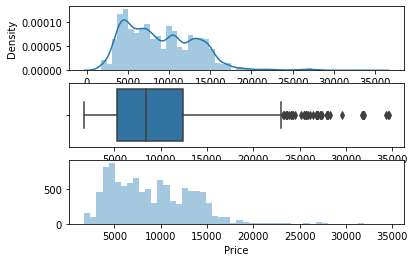

In [334]:
plot(data,'Price')

In [335]:
# perform feature selection

In [336]:
data.head(15)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,...,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,BLR → DEL,2h 50m,0,No info,3897.0,24,3,...,1,10,2,50,170,1,0,0,0,0
1,7,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662.0,5,1,...,13,15,7,25,445,0,1,0,0,0
2,10,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2,No info,13882.0,6,9,...,4,25,19,0,1140,0,0,1,0,0
3,3,Kolkata,3,CCU → NAG → BLR,5h 25m,1,No info,6218.0,5,12,...,23,30,5,25,325,0,1,0,0,0
4,3,Banglore,2,BLR → NAG → DEL,4h 45m,1,No info,13302.0,3,1,...,21,35,4,45,285,1,0,0,0,0
5,1,Kolkata,3,CCU → BLR,2h 25m,0,No info,3873.0,24,6,...,11,25,2,25,145,0,1,0,0,0
6,10,Banglore,2,BLR → BOM → DEL,15h 30m,1,In-flight meal not included,11087.0,3,12,...,10,25,15,30,930,1,0,0,0,0
7,10,Banglore,2,BLR → BOM → DEL,21h 5m,1,No info,22270.0,3,1,...,5,5,21,5,1265,1,0,0,0,0
8,10,Banglore,2,BLR → BOM → DEL,25h 30m,1,In-flight meal not included,11087.0,3,12,...,10,25,25,30,1530,1,0,0,0,0
9,8,Delhi,4,DEL → BOM → COK,7h 50m,1,No info,8625.0,27,5,...,19,15,7,50,470,0,0,1,0,0


In [337]:
data.drop(columns=['Source','Route','Duration','Additional_Info'],axis=1,inplace=True)

In [338]:
data.head()

,Airline,Destination,Total_Stops,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897.0,24,3,2019,22,20,1,10,2,50,170,1,0,0,0,0
1,7,3,2,7662.0,5,1,2019,5,50,13,15,7,25,445,0,1,0,0,0
2,10,4,2,13882.0,6,9,2019,9,25,4,25,19,0,1140,0,0,1,0,0
3,3,3,1,6218.0,5,12,2019,18,5,23,30,5,25,325,0,1,0,0,0
4,3,2,1,13302.0,3,1,2019,16,50,21,35,4,45,285,1,0,0,0,0


In [339]:
data.dtypes

Airline                  int64
Destination              int64
Total_Stops              int64
Price                  float64
journey_day              int64
journey_month            int64
journey_year             int64
Dep_Time_hour            int64
Dep_Time_min             int64
Arrival_Time_hour        int64
Arrival_Time_min         int64
Duration_hours           int64
Duration_mins            int64
Duration_total_mins      int64
Source_Banglore          int64
Source_Kolkata           int64
Source_Delhi             int64
Source_Chennai           int64
Source_Mumbai            int64
dtype: object

In [340]:
from sklearn.feature_selection import mutual_info_regression

In [341]:
X = data.drop(['Price'],axis=1)

In [342]:
y = data['Price']

In [343]:
X.dtypes

Airline                int64
Destination            int64
Total_Stops            int64
journey_day            int64
journey_month          int64
journey_year           int64
Dep_Time_hour          int64
Dep_Time_min           int64
Arrival_Time_hour      int64
Arrival_Time_min       int64
Duration_hours         int64
Duration_mins          int64
Duration_total_mins    int64
Source_Banglore        int64
Source_Kolkata         int64
Source_Delhi           int64
Source_Chennai         int64
Source_Mumbai          int64
dtype: object

In [344]:
mutual_info_regression(X,y)

array([0.97961166, 0.9997108 , 0.79453721, 0.19068718, 0.23150713,
       0.        , 0.32519104, 0.27038803, 0.40523182, 0.35281186,
       0.46764988, 0.34447403, 0.49094848, 0.39241891, 0.45133539,
       0.51457764, 0.13182208, 0.20445628])

In [345]:
imp=pd.DataFrame(mutual_info_regression(X,y),index=X.columns) 
imp

,0
Airline,0.976371
Destination,0.998576
Total_Stops,0.795890
journey_day,0.199161
journey_month,0.239621
journey_year,0.012992
Dep_Time_hour,0.346575
Dep_Time_min,0.256700
Arrival_Time_hour,0.394969
Arrival_Time_min,0.355803


In [346]:
imp.columns=['Importance']

In [347]:
imp.sort_values(by='Importance', ascending=False)

,Importance
Destination,0.998576
Airline,0.976371
Total_Stops,0.795890
Source_Delhi,0.521049
Duration_total_mins,0.501546
Duration_hours,0.468564
Source_Kolkata,0.452930
Arrival_Time_hour,0.394969
Source_Banglore,0.386273
Arrival_Time_min,0.355803


In [348]:
# Buil ML model

In [349]:
# Save ML model

In [350]:
from sklearn.model_selection import train_test_split

In [351]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [352]:
from sklearn.ensemble import RandomForestRegressor

In [353]:
ml_model=RandomForestRegressor()

In [354]:
model= ml_model.fit(X_train,y_train)

In [355]:
y_pred= model.predict(X_test) 
y_pred

array([16761.39,  6257.27,  8904.78, ...,  3532.1 ,  6106.77,  7232.4 ])

In [356]:
y_pred.shape

(2671,)

In [357]:
import pickle

In [358]:
file=open('rf_random.pk1','wb')

In [359]:
pickle.dump(model,file)

In [360]:
model=open('rf_random.pk1','rb')

In [361]:
forest=pickle.load(model)

In [362]:
forest.predict(X_test)

array([16761.39,  6257.27,  8904.78, ...,  3532.1 ,  6106.77,  7232.4 ])

In [363]:
# define your Evaluation metric

In [364]:
# MAPE : Mean Absolute Percentage Error

In [365]:
def mape(y_true,y_pred):
  y_true,y_pred = np.array(y_true), np.array(y_pred)

  return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [366]:
mape(y_test,forest.predict(X_test))

13.183284851163116

In [367]:
# Automate ML pipeline

In [368]:
def predict(ml_model):
  model = ml_model.fit(X_train, y_train)
  print(f'Training score : {model.score(X_train,y_train)}') 
  y_prediction = model.predict(X_test)
  print(f'Prediction : {y_prediction}')
  print('\n')
  
  from sklearn import metrics
  print(f'r2_Score: {metrics.r2_score(y_test,y_prediction)}')
  print(f'MSE: {metrics.mean_squared_error(y_test,y_prediction)}') 
  print(f'MAE: {metrics.mean_absolute_error(y_test,y_prediction)}') 
  print(f'RMSE: {np.sqrt(metrics.mean_absolute_error(y_test,y_prediction))}') 
  print(f'MAPE: {mape(y_test,y_prediction)}') 
  sns.distplot(y_test-y_prediction)

Training score : 0.9503942462567411
Prediction : [16674.87  5974.66  8770.18 ...  3573.99  6313.58  7722.83]


r2_Score: 0.8108807300141249
MSE: 3681698.237103416
MAE: 1177.6452130794557
RMSE: 34.31683570901396
MAPE: 13.213389977519139


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


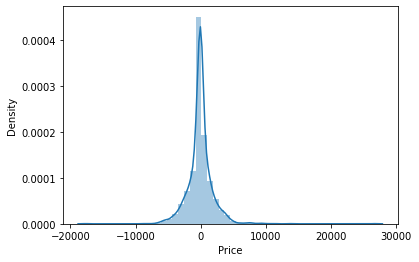

In [369]:
predict(RandomForestRegressor())

In [370]:
# Hypertune ML model

In [371]:
from sklearn.model_selection import RandomizedSearchCV

In [372]:
reg_rf = RandomForestRegressor()

In [373]:
np.linspace(start=900,stop=1450,num=9)

array([ 900.  ,  968.75, 1037.5 , 1106.25, 1175.  , 1243.75, 1312.5 ,
       1381.25, 1450.  ])

In [374]:
[int(x) for x in np.linspace(start=800,stop=1600,num=8)]

[800, 914, 1028, 1142, 1257, 1371, 1485, 1600]

In [375]:
[int(x) for x in np.linspace(start=4,stop=11,num=10)]

[4, 4, 5, 6, 7, 7, 8, 9, 10, 11]

In [376]:
n_estimators=[int(x) for x in np.linspace(start=1000,stop=1200,num=6)] 
max_depth=[int(x) for x in np.linspace(start=5,stop=10,num=4)] 
min_samples_split=[5,10,15,100]
max_features=['auto', 'sqrt']

In [377]:
random_grid = {
  'n_estimators': n_estimators, 
  'max_depth': max_depth, 
  'max_features': max_features, 
  'min_samples_split': min_samples_split
}

In [378]:
random_grid

{'n_estimators': [1000, 1040, 1080, 1120, 1160, 1200],
 'max_depth': [5, 6, 8, 10],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [5, 10, 15, 100]}

In [379]:
rf_random = RandomizedSearchCV(reg_rf, param_distributions=random_grid, cv=3, verbose=2) 
rf_random

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 6, 8, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [1000, 1040, 1080, 1120,
                                                         1160, 1200]},
                   verbose=2)

In [380]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=10, max_features=auto, min_samples_split=100, n_estimators=1040; total time=  11.6s
[CV] END max_depth=10, max_features=auto, min_samples_split=100, n_estimators=1040; total time=  11.2s
[CV] END max_depth=10, max_features=auto, min_samples_split=100, n_estimators=1040; total time=  11.1s
[CV] END max_depth=8, max_features=auto, min_samples_split=100, n_estimators=1200; total time=  11.9s
[CV] END max_depth=8, max_features=auto, min_samples_split=100, n_estimators=1200; total time=  12.0s
[CV] END max_depth=8, max_features=auto, min_samples_split=100, n_estimators=1200; total time=  12.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=100, n_estimators=1080; total time=   4.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=100, n_estimators=1080; total time=   4.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=100, n_estimators=1080; total time=   4.3s
[CV] END max_de

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 6, 8, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [1000, 1040, 1080, 1120,
                                                         1160, 1200]},
                   verbose=2)

In [381]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'max_features': 'auto',
 'max_depth': 8}

In [382]:
pred2=rf_random.predict(X_test) 
pred2

array([16438.55712516,  5910.48829226,  8610.14206488, ...,
        4334.17628038,  8914.42938468,  7400.5014005 ])

In [383]:
from sklearn import metrics 
metrics.r2_score(y_test,pred2)

0.8039426437844467